In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import discrete_pendulum
from utils import *

algorithms = ['sarsa', 'q_learning']


def test_x_to_s(env):
    theta = np.linspace(-np.pi * (1 - (1 / env.n_theta)), np.pi * (1 - (1 / env.n_theta)), env.n_theta)
    thetadot = np.linspace(-env.max_thetadot * (1 - (1 / env.n_thetadot)),
                           env.max_thetadot * (1 - (1 / env.n_thetadot)), env.n_thetadot)
    for s in range(env.num_states):
        i = s // env.n_thetadot
        j = s % env.n_thetadot
        s1 = env._x_to_s([theta[i], thetadot[j]])
        if s1 != s:
            raise Exception(f'test_x_to_s: error in state representation: {s} and {s1} should be the same')
    print('test_x_to_s: passed')


env = discrete_pendulum.Pendulum(n_theta=31, n_thetadot=31)

# Apply unit test to check state representation
test_x_to_s(env)

# Initialize simulation
s = env.reset()

learn = get_learn_function(algorithms[1])
model = learn(env, scene='pendulum', epsilon=0.3, alpha=0.9, max_it=2000)

test_x_to_s: passed
Episode 0 of 2000 finished
Episode 200 of 2000 finished
Episode 400 of 2000 finished
Episode 600 of 2000 finished
Episode 800 of 2000 finished
Episode 1000 of 2000 finished
Episode 1200 of 2000 finished
Episode 1400 of 2000 finished
Episode 1600 of 2000 finished
Episode 1800 of 2000 finished
[[0.33296614 0.0523363  0.75575748 ... 0.39231755 0.55791701 0.06055202]
 [0.02002008 0.32758623 0.96015319 ... 0.72065382 0.65022304 0.00401832]
 [0.01617643 0.51538916 0.36336966 ... 0.53107785 0.86006167 0.92347407]
 ...
 [0.46781502 0.58935775 0.06836538 ... 0.59343489 0.89689057 0.39942652]
 [0.40717783 0.88759812 0.14986558 ... 0.61980607 0.67085115 0.28042224]
 [0.02898879 0.65777534 0.66415844 ... 0.35547564 0.04186698 0.19288427]]
[12 10 30  6 13 28  8 19 21  3  8 25  4  9  0  3 26 11 21 29 11 26 26 15
 22  4 27 26 15 11 15 24 27 13  7 23 21 25 11 12  5  0  3  9 15  5  5 28
 28 18 28 29 28 23 13 12  6 10 30 30  2 30  1 19 30  3 18 11 11  9 15  0
  9  1 11 26 11  0 21 29

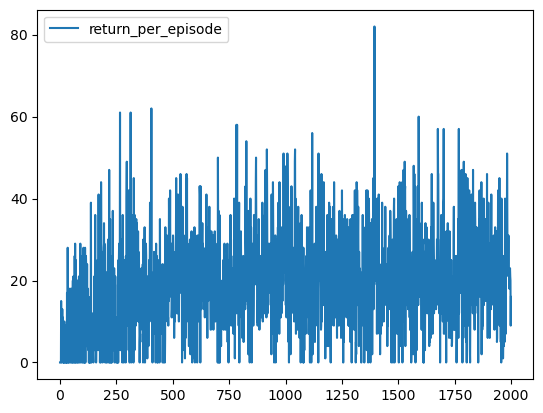

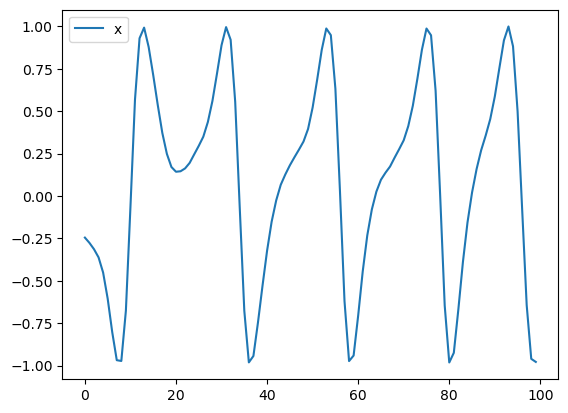

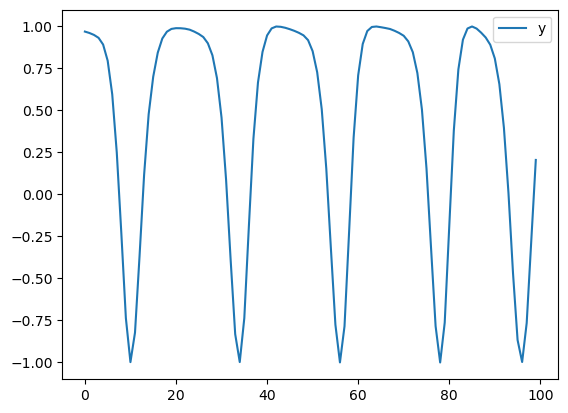

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
29


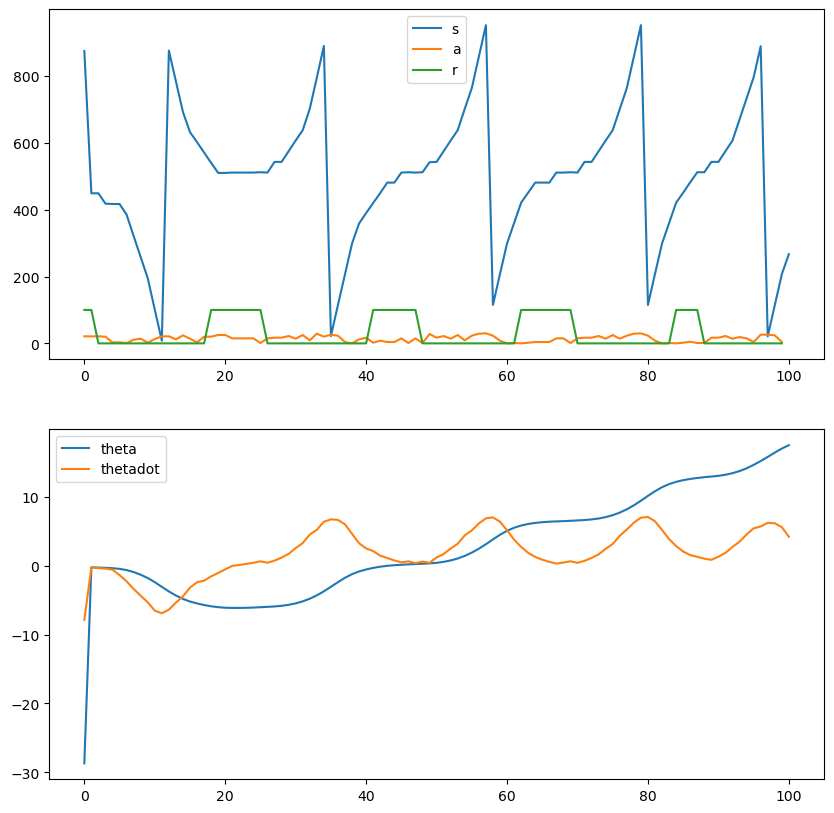

In [7]:
model.plot.clear(['x', 'y'])
log = {
    't': [0],
    's': [s],
    'a': [],
    'r': [],
    'theta': [env.x[0]],  # agent does not have access to this, but helpful for display
    'thetadot': [env.x[1]],  # agent does not have access to this, but helpful for display
}
# Simulate until episode is done
s = env.reset()
done = False
while not done:
    a = model.get_policy(s)
    # a = random.randrange(env.num_actions)
    (s, r, done) = env.step(a)
    log['t'].append(log['t'][-1] + 1)
    log['s'].append(s)
    log['a'].append(a)
    log['r'].append(r)
    theta = env.x[0]
    thetadot = env.x[1]
    log['theta'].append(theta)
    log['thetadot'].append(thetadot)

    # Plot x and y coordinates from theta
    x = env.params['l'] * np.sin(theta)
    y = env.params['l'] * np.cos(theta)
    model.plot.add('x', x)
    model.plot.add('y', y)

model.plot.plot(save=True)
print(log['r'])
print(sum(log['r']))

# Plot data and save to png file
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(log['t'], log['s'])
ax[0].plot(log['t'][:-1], log['a'])
ax[0].plot(log['t'][:-1], np.array(log['r'])*100)
ax[0].legend(['s', 'a', 'r'])
ax[1].plot(log['t'], log['theta'])
ax[1].plot(log['t'], log['thetadot'])
ax[1].legend(['theta', 'thetadot'])
plt.savefig('figures/pendulum/test_discrete_pendulum.png')
plt.show()